In [1]:
import pandas as pd
import numpy as np
import random
import timeit
import requests
from citipy import citipy
from config import api_key

In [2]:
lats=np.random.uniform(-90.000,90.000, size=1500)
lngs=np.random.uniform(-180.000,180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)
len(coordinates)

1500

In [4]:
city="London"
url="http://api.openweathermap.org/data/2.5/weather?"
query_url= url + "appid=" + api_key + "&q=" + city

In [5]:
resp= requests.get(query_url)
print(resp)
resp.json()

<Response [200]>


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 291.01,
  'feels_like': 290.91,
  'temp_min': 287.98,
  'temp_max': 293.15,
  'pressure': 1021,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 80},
 'clouds': {'all': 5},
 'dt': 1626998111,
 'sys': {'type': 2,
  'id': 2006068,
  'country': 'GB',
  'sunrise': 1627013473,
  'sunset': 1627070545},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [6]:
cities=[]
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    cities.append(city)
print(len(cities))

1500


In [7]:
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# from datetime import datetime
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [8]:
from datetime import datetime
city_data = []
for city in cities:
#     print(city)
    url="http://api.openweathermap.org/data/2.5/weather?"
    query_url= url + "appid=" + api_key + "&q=" + city
    resps=requests.get(query_url).json()
#     print(resps)
    try:
#         print(resps["weather"][0]["main"])
        country = resps["sys"]["country"]
        lat = resps["coord"]["lat"]
        lng = resps["coord"]["lon"]
        max_temp = resps["main"]["temp_max"]
        humidity = resps["main"]["humidity"]
        clouds = resps["clouds"]["all"]
        wind = resps["wind"]["speed"]
        date = resps["dt"]
        city_date=datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": city_date})       
    except KeyError:
        pass 

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)       

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petatlan,17.5167,-101.2667,302.54,71,71,1.03,MX,2021-07-22 23:59:37
1,Vaini,-21.2000,-175.2000,300.24,78,20,3.09,TO,2021-07-22 23:51:36
2,Cap Malheureux,-19.9842,57.6142,294.42,68,46,1.34,MU,2021-07-22 23:57:43
3,Mataura,-46.1927,168.8643,281.19,81,12,1.36,NZ,2021-07-22 23:54:34
4,Punta Arenas,-53.1500,-70.9167,276.21,81,40,2.57,CL,2021-07-22 23:59:38
5,Thompson,55.7435,-97.8558,300.24,54,40,4.12,CA,2021-07-22 23:55:19
6,Morgan City,29.6994,-91.2068,304.82,76,23,3.21,US,2021-07-22 23:59:38
7,Hithadhoo,-0.6000,73.0833,299.63,81,100,4.48,MV,2021-07-22 23:59:38
8,Rikitea,-23.1203,-134.9692,296.08,73,10,8.25,PF,2021-07-22 23:59:39
9,Khatanga,71.9667,102.5000,290.09,64,79,4.63,RU,2021-07-22 23:51:17


In [9]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1356 non-null   object 
 1   Lat         1356 non-null   float64
 2   Lng         1356 non-null   float64
 3   Max Temp    1356 non-null   float64
 4   Humidity    1356 non-null   int64  
 5   Cloudiness  1356 non-null   int64  
 6   Wind Speed  1356 non-null   float64
 7   Country     1356 non-null   object 
 8   Date        1356 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 95.5+ KB


In [10]:
new_columns_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_columns_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petatlan,MX,2021-07-22 23:59:37,17.5167,-101.2667,302.54,71,71,1.03
1,Vaini,TO,2021-07-22 23:51:36,-21.2000,-175.2000,300.24,78,20,3.09
2,Cap Malheureux,MU,2021-07-22 23:57:43,-19.9842,57.6142,294.42,68,46,1.34
3,Mataura,NZ,2021-07-22 23:54:34,-46.1927,168.8643,281.19,81,12,1.36
4,Punta Arenas,CL,2021-07-22 23:59:38,-53.1500,-70.9167,276.21,81,40,2.57


In [28]:
output_data_file = "./cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
northern_hemi_df=city_data_df[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df[(city_data_df["Lat"]<0)]

In [13]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

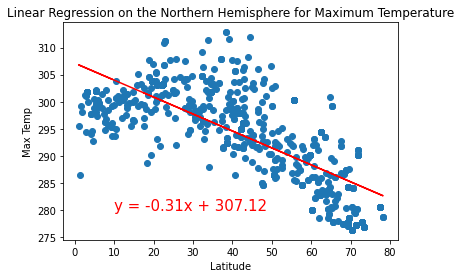

In [14]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,280))

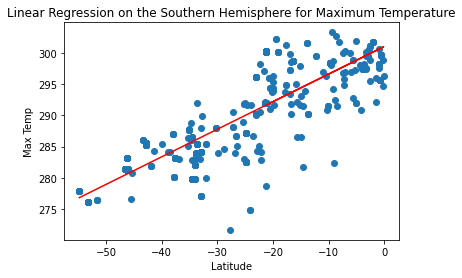

In [15]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,305))

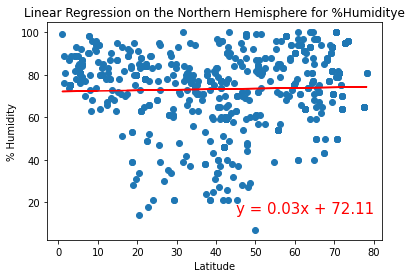

In [16]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for %Humiditye', 
                       '% Humidity',(45,15))

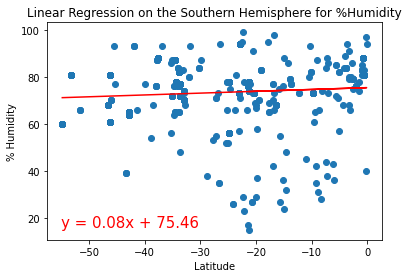

In [17]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for %Humidity', 
                       '% Humidity',(-55,16))

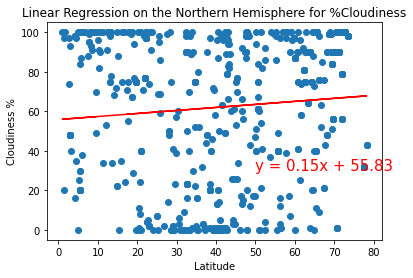

In [18]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for %Cloudiness', 
                       'Cloudiness %',(50,30))

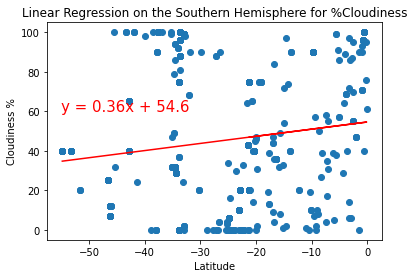

In [25]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for %Cloudiness', 
                       'Cloudiness %',(-55,60))

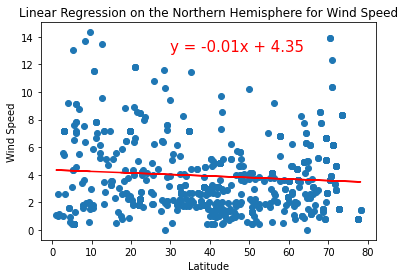

In [24]:
x_values=northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(30,13))


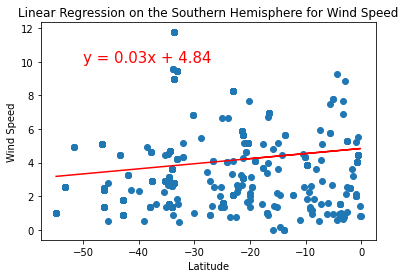

In [22]:
x_values=southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression( x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,10))

In [43]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petatlan,MX,2021-07-22 23:59:37,17.5167,-101.2667,302.54,71,71,1.03
1,Vaini,TO,2021-07-22 23:51:36,-21.2000,-175.2000,300.24,78,20,3.09
2,Cap Malheureux,MU,2021-07-22 23:57:43,-19.9842,57.6142,294.42,68,46,1.34
3,Mataura,NZ,2021-07-22 23:54:34,-46.1927,168.8643,281.19,81,12,1.36
4,Punta Arenas,CL,2021-07-22 23:59:38,-53.1500,-70.9167,276.21,81,40,2.57


In [46]:
min_temp= float(input("What min temp you'd like?"))
max_temp= float(input("What max temp you'd like?"))

What min temp you'd like?300
What max temp you'd like?320


In [49]:
prefered_city = city_data_df.loc[(city_data_df["Max Temp"]> min_temp) & (city_data_df["Max Temp"]< max_temp)]
prefered_city.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petatlan,MX,2021-07-22 23:59:37,17.5167,-101.2667,302.54,71,71,1.03
1,Vaini,TO,2021-07-22 23:51:36,-21.2000,-175.2000,300.24,78,20,3.09
5,Thompson,CA,2021-07-22 23:55:19,55.7435,-97.8558,300.24,54,40,4.12
6,Morgan City,US,2021-07-22 23:59:38,29.6994,-91.2068,304.82,76,23,3.21
17,Avarua,CK,2021-07-22 23:52:03,-21.2078,-159.7750,300.18,74,75,5.66


In [52]:
import gmaps
from config import g_key


In [58]:
hotel_df=prefered_city.copy()
hotel_df["Hotel Name"]=""
hotel_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Hotel Name
0,Petatlan,MX,2021-07-22 23:59:37,17.5167,-101.2667,302.54,71,71,1.03,
1,Vaini,TO,2021-07-22 23:51:36,-21.2000,-175.2000,300.24,78,20,3.09,
5,Thompson,CA,2021-07-22 23:55:19,55.7435,-97.8558,300.24,54,40,4.12,
6,Morgan City,US,2021-07-22 23:59:38,29.6994,-91.2068,304.82,76,23,3.21,
17,Avarua,CK,2021-07-22 23:52:03,-21.2078,-159.7750,300.18,74,75,5.66,


In [61]:
hotel_df["Lng"][0]

-101.2667

In [69]:
# base_url= "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# params= {
#     "radius": 5000,
#     "type": "lodging",
#     "key": g_key,
#     "location": "17.5167,-101.2667"
# }

# hotels=requests.get(base_url,params=params).json()
# print(hotels)

In [67]:
len(hotels)

3

In [74]:
for index, row in hotel_df.iterrows():
    lat=hotel_df["Lat"]
    lng=hotel_df["Lng"]
    base_url= "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    params= {
        "radius": 5000,
        "type": "lodging",
        "key": g_key,
        "location": f"{lat},{lng}"
    }
    hotels=requests.get(base_url,params=params).json()
    try:
        hotel_df.loc[index, "Hotel Name"]=hotels["results"][0]["name"]
    except (IndexError):
        pass

In [76]:
hotels

{'html_attributions': [], 'results': [], 'status': 'INVALID_REQUEST'}